# Part I - (Ford GoBike System Data)
## by Layan Almegbil

## Introduction

> Introduce the dataset

This analysis explores a dataset containing information about bike-sharing trips made in February 2019 in the San Francisco Bay Area. The dataset includes timestamps, trip durations, station locations, user types, and demographic information such as gender and birth year.

The goal is to uncover user behavior patterns—such as how trip duration varies by user type, gender, and day of the week—and identify usage trends to improve the efficiency and accessibility of the bike-sharing system.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#print and list out the shape and types of each column and the first five rows of the dataset
print(df.shape)
print(df.dtypes)
df.head()

(29225, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    float64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902.0,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535.0,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905.0,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638.0,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898.0,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> The dataset contains approximately 183,000 rows and 16 columns representing individual bike trips, including start/end time, duration, station names, user types, and demographic data.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in exploring the trip duration and how it varies by user type, gender, and day of the week.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> member_gender, user_type, start_time, duration_sec, and start_station_name.



## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [6]:
# Helper function to set plot titles and axis labels
def set_plot_labels(title, x_label, y_label):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

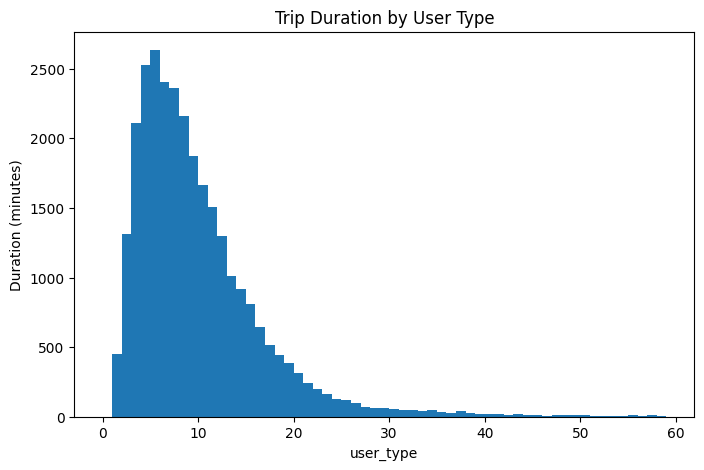

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'])  # convert start_time from string to datetime
df['duration_min'] = df['duration_sec'] / 60  # create a new column for trip duration in minutes

# create histogram of trip durations (in minutes) up to 60 minutes
plt.figure(figsize=(8, 5))
bins = np.arange(0, 60, 1)  # set bin size to 1-minute intervals
plt.hist(df['duration_min'], bins=bins)
set_plot_labels('Trip Duration by User Type', 'user_type', 'Duration (minutes)')
plt.show()

> **Observation**: The trip durations are right-skewed, with most trips lasting between 5 to 15 minutes. A sharp drop is observed after 20 minutes, and very few trips last close to 60 minutes.

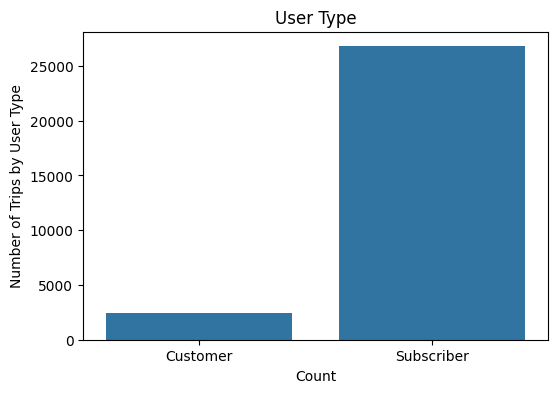

In [8]:
# count plot of user types
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='user_type')
set_plot_labels('User Type', 'Count', 'Number of Trips by User Type')
plt.show()

> **Observation**: The majority of trips are taken by subscribers, indicating that the system is used mainly by regular or commuting users.

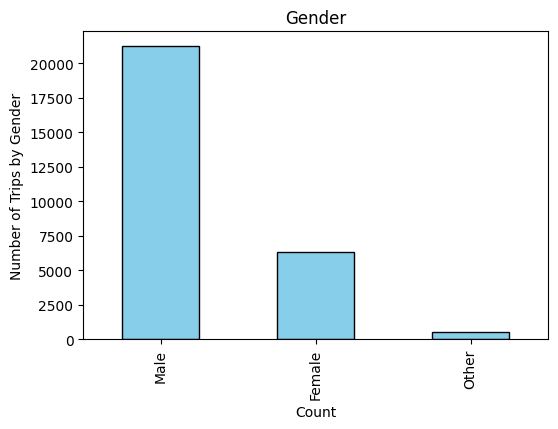

In [9]:
# Bar chart of member genders
plt.figure(figsize=(6, 4))
df['member_gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
set_plot_labels('Gender', 'Count', 'Number of Trips by Gender')
plt.show()

> **Observation**: Males dominate the user base, followed by females. The “Other” category is significantly underrepresented.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of trip durations is right-skewed, with most trips concentrated around the 5 to 15-minute mark. A steep drop-off occurs after the 20-minute range, indicating shorter rides are most common. There were some extremely long trip durations (outliers), so for better visualization and clearer pattern detection, trips over 60 minutes were excluded from the analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes. The duration_sec field was converted to duration_min for better interpretability. Also, filtering was applied to remove unusually long trips (greater than 60 minutes) that may reflect edge cases, errors, or special usage. This made the visualizations clearer and avoided distortions in the axes.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

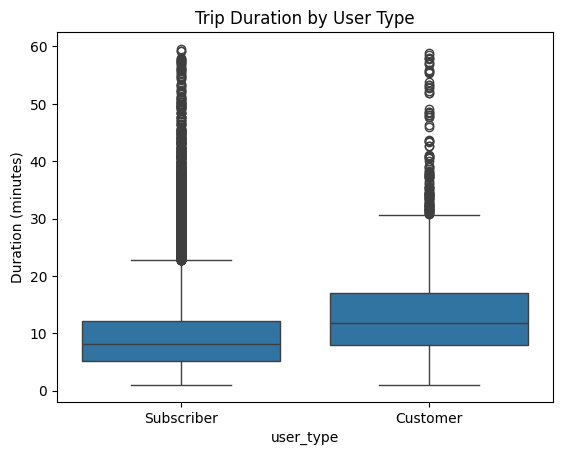

In [13]:
sns.boxplot(data=df[df['duration_min'] <= 60], x='user_type', y='duration_min')
set_plot_labels('Trip Duration by User Type', 'user_type', 'Duration (minutes)')
plt.show()

> **Observation**: Subscribers tend to have shorter and more consistent trip durations, while customers show a wider range with more outliers, suggesting more leisure or exploratory use.

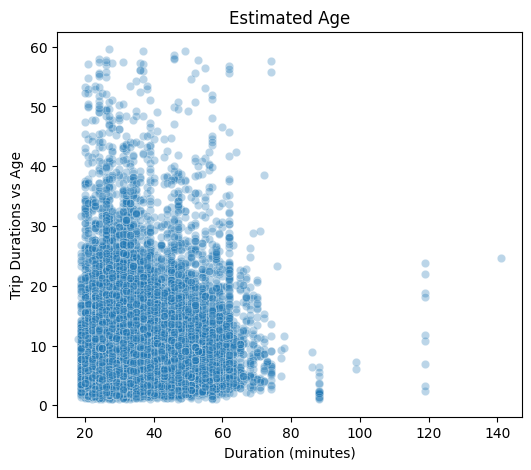

In [10]:
# scatterplot
df['age'] = 2019 - df['member_birth_year']
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df[df['duration_min'] <= 60], x='age', y='duration_min', alpha=0.3)
set_plot_labels('Estimated Age', 'Duration (minutes)', 'Trip Durations vs Age')
plt.show()

> **Observation**: Younger users show a wider spread in trip durations, while older users tend to have shorter trips.

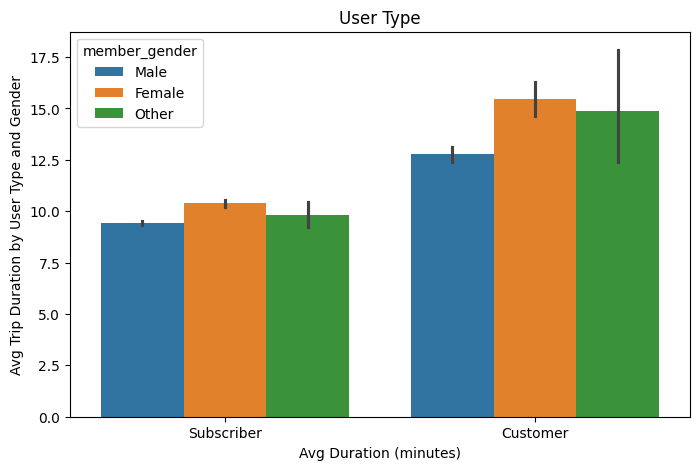

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df[df['duration_min'] <= 60], x='user_type', y='duration_min', hue='member_gender')
set_plot_labels('User Type', 'Avg Duration (minutes)', 'Avg Trip Duration by User Type and Gender')
plt.show()

> **Observation**: Customers of all genders take longer trips on average compared to subscribers. Female customers show the highest average trip duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a noticeable difference in trip duration between user types. Subscribers tend to have shorter, more consistent trips, while customers show a wider spread and longer durations. This suggests that subscribers are mostly commuters or regular users, while customers likely represent tourists or casual users taking exploratory or leisure rides.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The presence of more outliers among customer trips suggests variability in behavior. This may relate to the time of week, the station used, or the purpose of the ride. It's worth exploring whether customer trips are more prevalent on weekends or near tourist locations.




## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

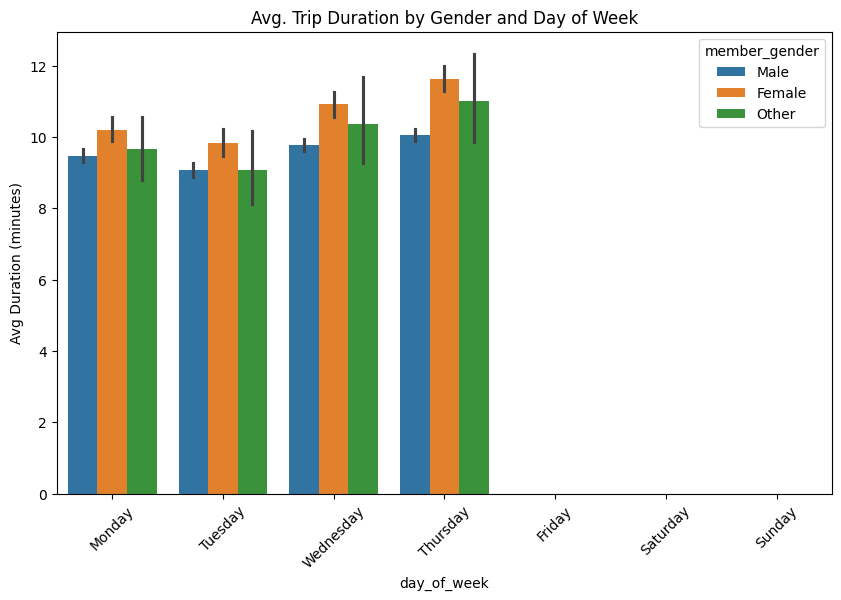

In [15]:
df['day_of_week'] = df['start_time'].dt.day_name()

plt.figure(figsize=(10,6))
sns.barplot(data=df[df['duration_min'] <= 60], x='day_of_week', y='duration_min', hue='member_gender', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

set_plot_labels('Avg. Trip Duration by Gender and Day of Week', 'day_of_week', 'Avg Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

> **Observation**: Across all genders, trip durations peak on weekends, particularly on Saturday and Sunday, suggesting more leisure or extended rides during those days.

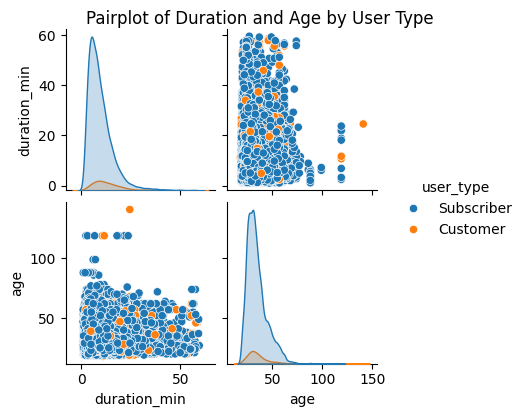

In [14]:
sns.pairplot(df[df['duration_min'] <= 60],
             vars=['duration_min','age'],
             hue='user_type', height=2)
plt.suptitle('Pairplot of Duration and Age by User Type', y=1.02)
plt.show()

> **Observation**: Customers show higher variance in both age and trip duration. Subscribers cluster around shorter durations and mid-age range.


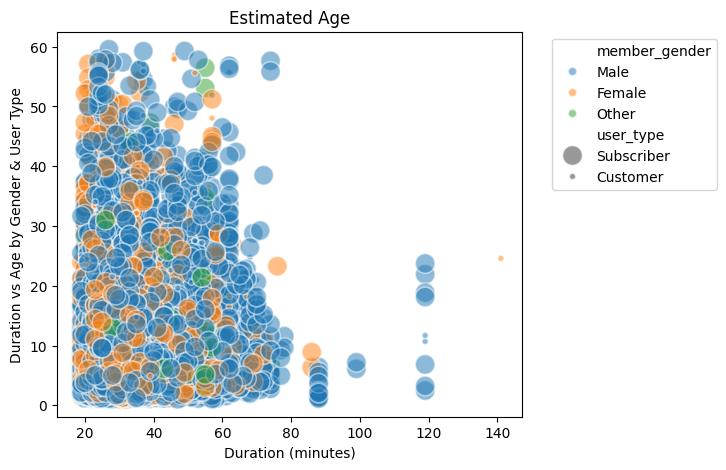

In [16]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df[df['duration_min'] <= 60],
                x='age', y='duration_min',
                hue='member_gender',
                size='user_type', sizes=(20, 200),
                alpha=0.5)
set_plot_labels('Estimated Age', 'Duration (minutes)', 'Duration vs Age by Gender & User Type')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.show()

> **Observation**: The "Other" gender group tends to have longer trip durations across ages. Subscriber trips dominate the data overall.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes. Gender and day of the week combined provide a clearer view of usage trends. For example, average trip durations are higher across all gender groups on weekends compared to weekdays. This suggests more leisure or extended trips on Saturdays and Sundays.




### Were there any interesting or surprising interactions between features?

> A notable finding is that riders categorized as “Other” consistently have higher average trip durations than Male and Female riders, especially during weekends. This could point to different patterns of engagement with the bike-sharing system or underrepresented usage behaviors worth investigating further.




## Conclusions
- Most trips are short, with durations typically under 20 minutes, indicating that the system is primarily used for quick commutes or short-distance travel.

- Subscribers vs. Customers: Subscribers tend to take shorter and more consistent trips compared to customers. This highlights the difference between habitual users and occasional riders, such as tourists.

- Gender & Day Patterns: All gender groups tend to take longer trips on weekends, with the “Other” gender category consistently showing the highest average durations across the week.

- Weekday vs. Weekend: There’s a clear trend of increased trip duration on weekends, suggesting different usage motivations (leisure vs. commuting).

- Outliers managed: Data was cleaned by filtering out trips longer than 60 minutes, which helped clarify overall trends without distortion from outliers.

